# Breast Cancer Analysis

In [1]:
import pandas as pd
from pandas.api.types import is_integer_dtype
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt

df = pd.read_csv('../data/kaggle/breast-cancer/breast-cancer-diagnostic.shuf.lrn.csv')
df2 = pd.read_csv('../data/kaggle/breast-cancer/breast-cancer-diagnostic.shuf.tes.csv')

print(f"{len(df.columns) - 2} attributes + ID + target (class), {len(df)} samples\n")

print("Basic Information:")
print(df.info())

30 attributes + ID + target (class), 285 samples

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       285 non-null    int64  
 1   class                    285 non-null    bool   
 2   radiusMean               285 non-null    float64
 3    textureMean             285 non-null    float64
 4    perimeterMean           285 non-null    float64
 5    areaMean                285 non-null    float64
 6    smoothnessMean          285 non-null    float64
 7    compactnessMean         285 non-null    float64
 8    concavityMean           285 non-null    float64
 9    concavePointsMean       285 non-null    float64
 10   symmetryMean            285 non-null    float64
 11   fractalDimensionMean    285 non-null    float64
 12   radiusStdErr            285 non-null    float64
 13   textureStd

## Separate + check columns

### id + target

id: ID (285)
target: class (2): [False  True]


(array([188.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  97.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

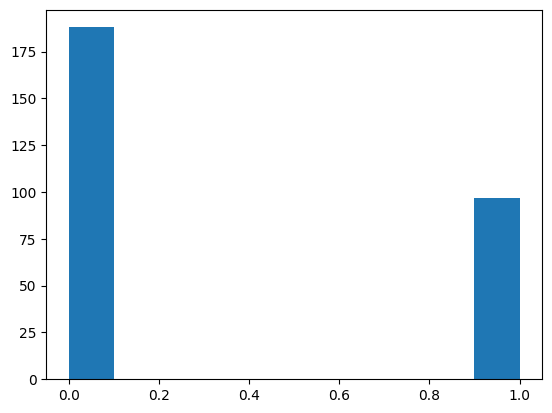

In [2]:
binary = []
categorical = []
ordinal = []
numeric = []
removed = []
columns = df.columns[2:].to_list()
print(f"id: ID ({df["ID"].nunique()})")
print(f"target: class ({df["class"].nunique()}): {df["class"].sort_values().unique()}")

plt.hist([1 if i else 0 for i in df["class"]])

### Check datatypes

In [3]:
print(f"total floats: {len(columns)}")
for col in columns:
    print(col + f" ({str(df[col].nunique())}): {df[col].unique() if df[col].nunique() <= 100 else "-"}")

numeric.extend(columns)

total floats: 30
radiusMean (253): -
 textureMean (257): -
 perimeterMean (273): -
 areaMean (282): -
 smoothnessMean (254): -
 compactnessMean (278): -
 concavityMean (276): -
 concavePointsMean (279): -
 symmetryMean (244): -
 fractalDimensionMean (274): -
 radiusStdErr (278): -
 textureStdErr (267): -
 perimeterStdErr (276): -
 areaStdErr (273): -
 smoothnessStdErr (280): -
 compactnessStdErr (276): -
 concavityStdErr (276): -
 concavePointsStdErr (269): -
 symmetryStdErr (265): -
 fractalDimensionStdErr (280): -
 radiusWorst (249): -
 textureWorst (269): -
 perimeterWorst (268): -
 areaWorst (277): -
 smoothnessWorst (244): -
 compactnessWorst (273): -
 concavityWorst (279): -
 concavePointsWorst (258): -
 symmetryWorst (272): -
 fractalDimensionWorst (275): -


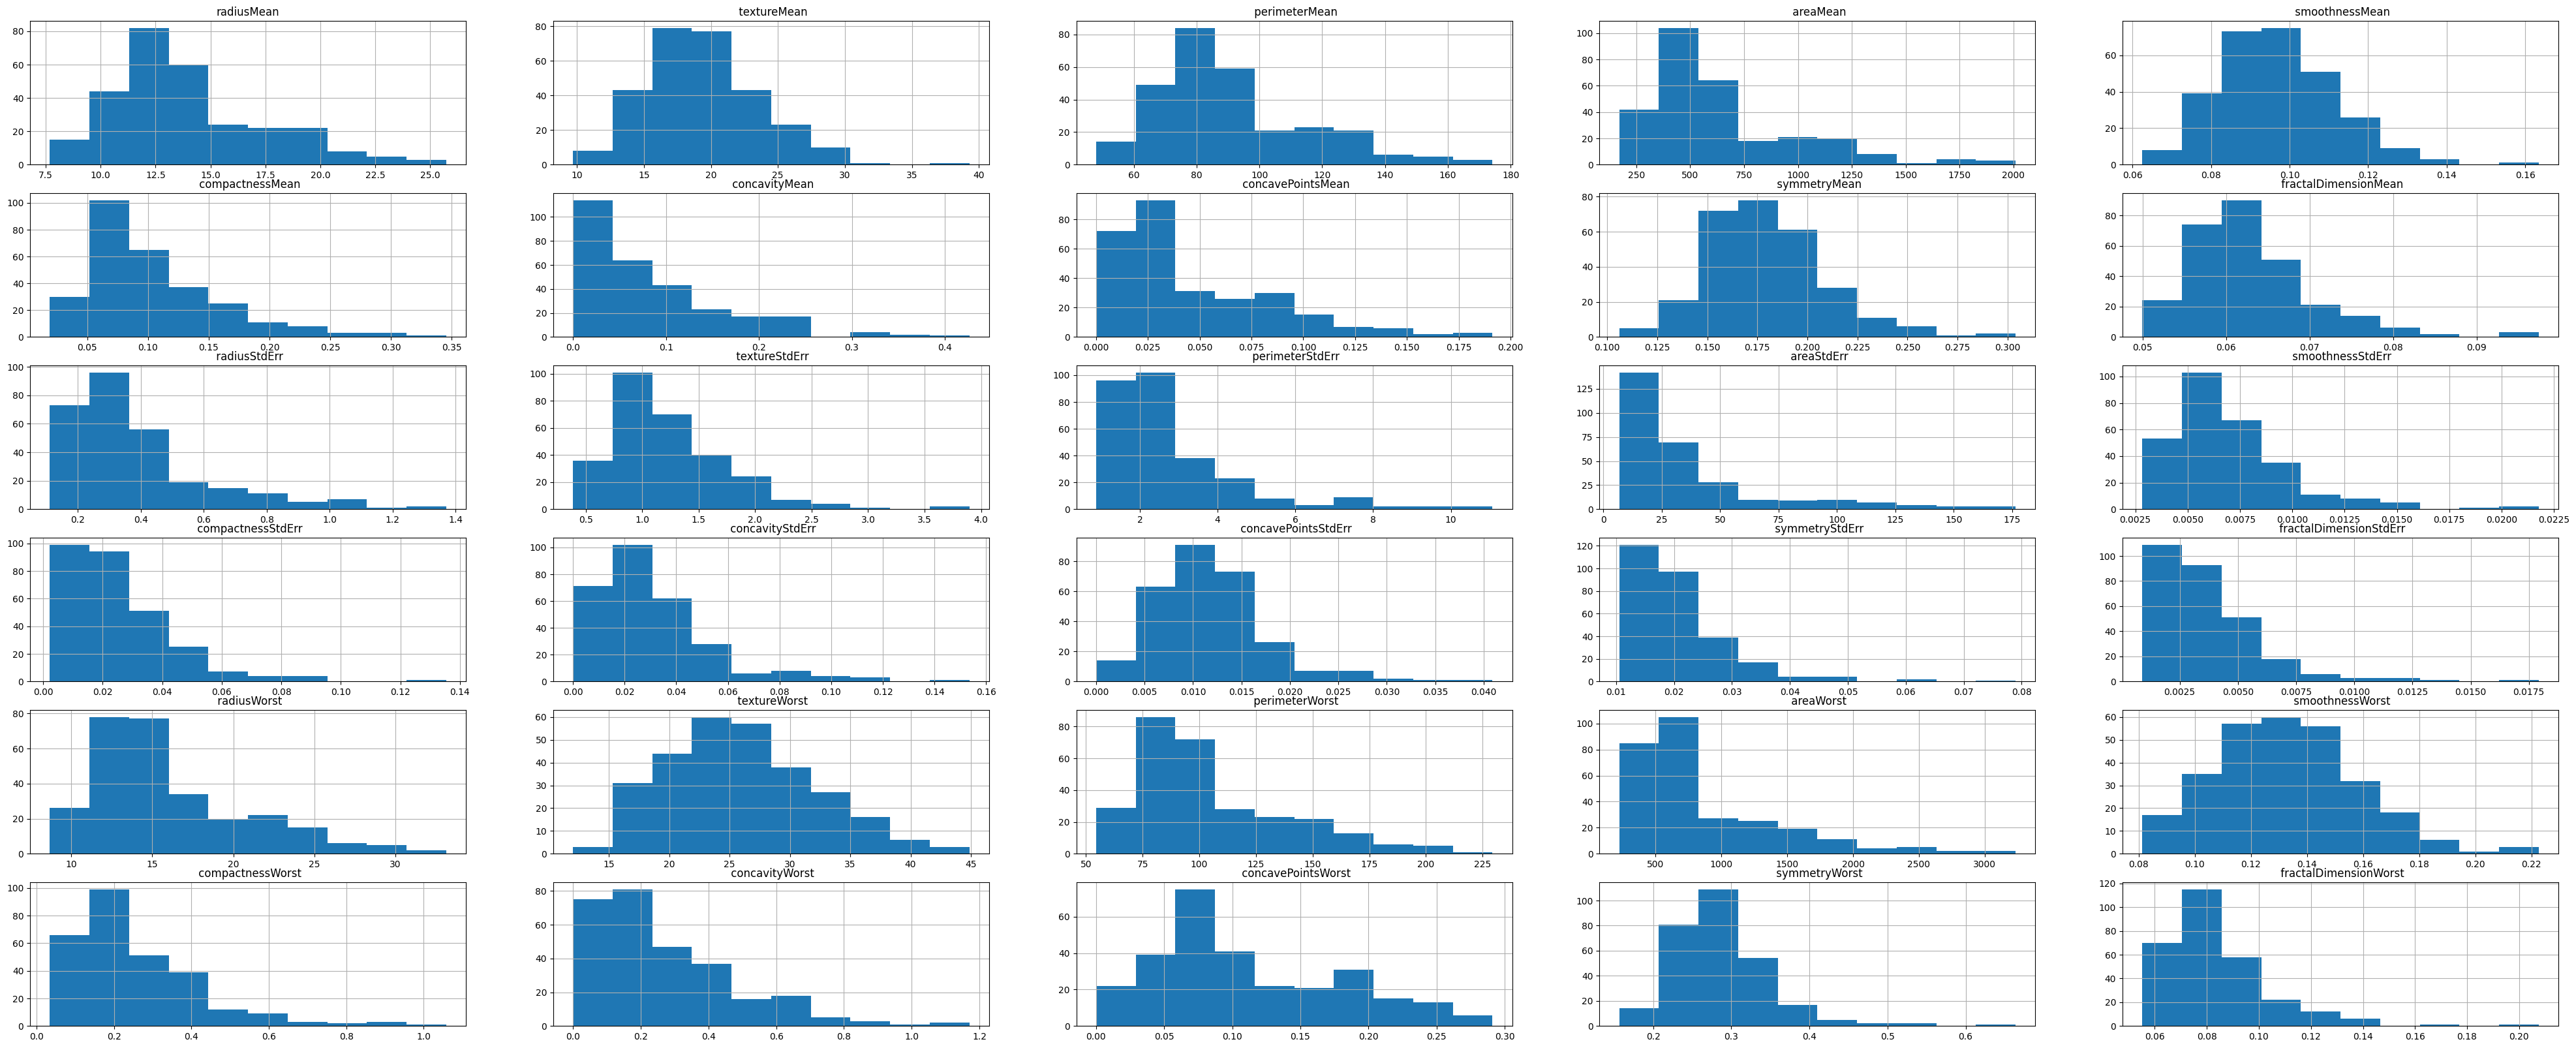

In [4]:


figure, axis = plt.subplots(6,5)

for i, col in enumerate(columns):
    df[col].hist(ax=axis[i//5, i%5], figsize=(50, 20), bins=10)
    axis[i//5, i%5].set_title(col)

plt.show()

All numeric, no missing values, so just ship it as it is (with the metadata)

In [ ]:
import os

os.makedirs("../data_processed", exist_ok=True)
df.to_csv("../data_processed/breast-cancer-diagnostic.shuf.lrn.csv", index=False )
df2.to_csv("../data_processed/breast-cancer-diagnostic.shuf.tes.csv", index=False )

In [62]:
import pickle

column_types ={
    "bin": binary,
    "cat": categorical,
    "ord": ordinal,
    "cont": numeric,
    "target": "class"
}

with open("../data_processed/breast-cancer_column_types.pkl", "wb") as f:
    pickle.dump(column_types, f)